<a href="https://colab.research.google.com/github/JanLeyva/approach_TFM/blob/master/inpainting_hm/inpainting_hm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


You could find the summary repository where you have all you will need in [github]()

## <font color='#A8EB15'> <b>  Inpainting - mmediting </b>

In [1]:
pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:14:57tcmalloc: large alloc 1147494400 bytes == 0x38bf0000 @  0x7f6a916c8615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:13:48tcmalloc: large alloc 1434370048 bytes == 0x7d246000 @  0x7f6a916c8615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.2 MB/s eta 0:09:59tcmalloc: large alloc 1792966656 bytes =

In [2]:
!git clone https://github.com/HimariO/mmediting-meme.git

Cloning into 'mmediting-meme'...
remote: Enumerating objects: 4702, done.
remote: Total 4702 (delta 0), reused 0 (delta 0), pack-reused 4702
Receiving objects: 100% (4702/4702), 3.59 MiB | 3.80 MiB/s, done.
Resolving deltas: 100% (3245/3245), done.


In [3]:
import os
os.chdir("/content/mmediting-meme")

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 537 kB 14.6 MB/s 
     |████████████████████████████████| 190 kB 69.4 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 42 kB 916 kB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.5.1-cp37-cp37m-linux_x86_64.whl size=34625743 sha256=ef2237908d1c59cd9271485da00c645f64ecb559d177a3eae8e59b145a25d809
  Stored in directory: /root/.cache/pip/wheels/2d/47/e4/489170de9a9dd7e38a1186f4cd5281c06aa8a92e3372781fc5
Successfully built mmcv-full
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [5]:
!pip install -v -e .  # or "python setup.py develop"

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

## <font color='#A8EB15'> <b>  Download pre-trained model </b>

In [6]:
os.chdir("/content")

In [7]:
!mkdir pretrain_model

In [8]:
os.chdir("/content/pretrain_model")

In [9]:
!wget https://download.openmmlab.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth

--2022-05-23 08:26:01--  https://download.openmmlab.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41573144 (40M) [application/octet-stream]
Saving to: ‘deepfillv2_256x256_8x2_places_20200619-10d15793.pth’

deepfillv2_256x256_ 100%[===================>]  39.65M  9.75MB/s    in 4.1s    

2022-05-23 08:26:06 (9.73 MB/s) - ‘deepfillv2_256x256_8x2_places_20200619-10d15793.pth’ saved [41573144/41573144]



In [10]:
os.chdir("/content")

In [11]:
!mkdir img_clean

In [12]:
!mkdir data

## <font color='#A8EB15'> <b> Download images </b>

In [13]:
os.chdir("/content/data")

In [14]:
%%time 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

--2022-05-23 08:33:54--  https://docs.google.com/uc?export=download&confirm=t&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3
Resolving docs.google.com (docs.google.com)... 142.250.145.101, 142.250.145.138, 142.250.145.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.145.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvvk1ftp31cbmeou04g49j7a9vhdq4bo/1653294825000/01761641334275034120/*/1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3?e=download [following]
--2022-05-23 08:33:54--  https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvvk1ftp31cbmeou04g49j7a9vhdq4bo/1653294825000/01761641334275034120/*/1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3?e=download
Resolving doc-14-44-docs.googleusercontent.com (doc-14-44-docs.googleusercontent.com)... 108.177.96.132, 2a00:1450:4013:c06::84
Connecting to doc-14-44-docs.googleusercontent.com (doc-1

In [15]:
%%time
!unzip -P "pass" hateful_memes.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: hateful_memes/img/82945.png  
  inflating: hateful_memes/img/15387.png  
  inflating: hateful_memes/img/81294.png  
  inflating: hateful_memes/img/75498.png  
  inflating: hateful_memes/img/14072.png  
  inflating: hateful_memes/img/23806.png  
  inflating: hateful_memes/img/71826.png  
  inflating: hateful_memes/img/84307.png  
  inflating: hateful_memes/img/56241.png  
  inflating: hateful_memes/img/10572.png  
  inflating: hateful_memes/img/51248.png  
  inflating: hateful_memes/img/19230.png  
  inflating: hateful_memes/img/05619.png  
  inflating: hateful_memes/img/03268.png  
  inflating: hateful_memes/img/72491.png  
  inflating: hateful_memes/img/35902.png  
  inflating: hateful_memes/img/43658.png  
  inflating: hateful_memes/img/80613.png  
  inflating: hateful_memes/img/96071.png  
  inflating: hateful_memes/img/35916.png  
  inflating: hateful_memes/img/21963.png  
  inflating: hateful_memes/img/46720

# <font color='#A8EB15'> <b>  mmlab-getting mask </b>

## <font color='#A8EB15'> <b> Clone repos </b> 

In [16]:
os.chdir("/content")

In [ ]:
#!git clone https://github.com/HimariO/mmdetection-meme.git

Cloning into 'mmdetection-meme'...
remote: Enumerating objects: 13094, done.
remote: Total 13094 (delta 0), reused 0 (delta 0), pack-reused 13094
Receiving objects: 100% (13094/13094), 13.66 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (8850/8850), done.


In [20]:
!git clone https://github.com/HimariO/HatefulMemesChallenge.git

Cloning into 'HatefulMemesChallenge'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (531/531), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 531 (delta 115), reused 514 (delta 107), pack-reused 0
Receiving objects: 100% (531/531), 3.05 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (115/115), done.


## <font color='#A8EB15'> <b> 1. Detect </b>

In [17]:
!pip install fire

     |████████████████████████████████| 87 kB 6.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=e8b88123cde6ded66467efcac269ed8808357b8c0475d3767adb544b7e6cad02
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [18]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 10 kB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 


In [21]:
%%bash

python3 /content/HatefulMemesChallenge/data_utils/ocr.py detect \
  /content/data/hateful_memes

Progress: |██████████████████████████████████████████████████| 100.0% CompleteFind 12140 images!
0/12140
1/12140
2/12140
3/12140
4/12140
5/12140
6/12140
7/12140
8/12140
9/12140
10/12140
11/12140
12/12140
13/12140
14/12140
15/12140
16/12140
17/12140
18/12140
19/12140
20/12140
21/12140
22/12140
23/12140
24/12140
25/12140
26/12140
27/12140
28/12140
29/12140
30/12140
31/12140
32/12140
33/12140
34/12140
35/12140
36/12140
37/12140
38/12140
39/12140
40/12140
41/12140
42/12140
43/12140
44/12140
45/12140
46/12140
47/12140
48/12140
49/12140
50/12140
51/12140
52/12140
53/12140
54/12140
55/12140
56/12140
57/12140
58/12140
59/12140
60/12140
61/12140
62/12140
63/12140
64/12140
65/12140
66/12140
67/12140
68/12140
69/12140
70/12140
71/12140
72/12140
73/12140
74/12140
75/12140
76/12140
77/12140
78/12140
79/12140
80/12140
81/12140
82/12140
83/12140
84/12140
85/12140
86/12140
87/12140
88/12140
89/12140
90/12140
91/12140
92/12140
93/12140
94/12140
95/12140
96/12140
97/12140
98/12140
99/12140
100/12140
101

In [ ]:
!ls /content/img_clean | wc -l

0


In [ ]:
# import pandas as pd
# pd.read_json("/content/data/hateful_memes/ocr.json")

## <font color='#A8EB15'> <b> 2. OCR </b>

In [22]:
%%bash

python3 /content/HatefulMemesChallenge/data_utils/ocr.py point_to_box \
        /content/data/hateful_memes/ocr.json

In [ ]:
import pandas as pd
pd.read_json("/content/data/test/ocr.box.json")

In [ ]:
!ls /content/data/img_mask_3px | wc -l

ls: cannot access '/content/data/img_mask_3px': No such file or directory
0


##  <font color='#A8EB15'> <b> 3. OCR to Box </b>

In [24]:
%%bash

python3 /content/HatefulMemesChallenge/data_utils/ocr.py generate_mask \
        /content/data/hateful_memes/ocr.box.json \
        /content/data/hateful_memes/img \
        /content/data/img_mask_3px

In [25]:
!ls /content/data/img_mask_3px | wc -l

24280


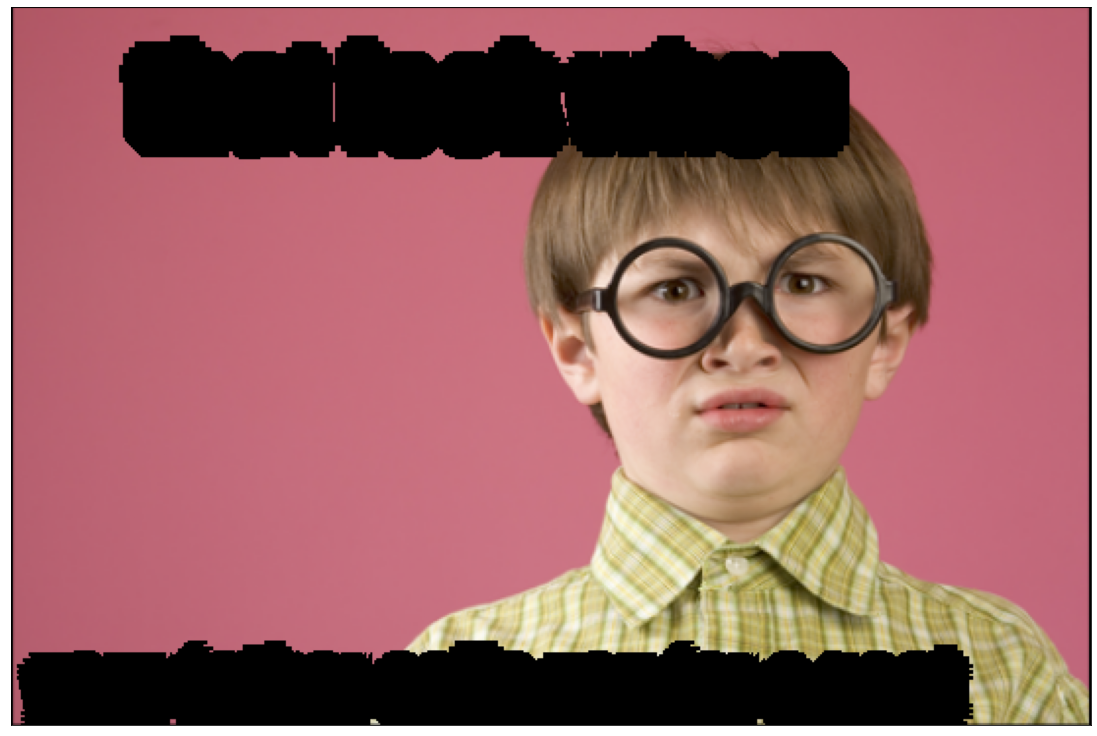

In [27]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/img_mask_3px/")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/img_mask_3px/",imgdir[1]))))

## <font color='#A8EB15'> <b>  4. Inpainting Images (last step) </b>

In [28]:
import torch
torch.__version__

'1.9.1+cu111'

In [29]:
# we must install the mmcv-full that match with the torch and CUDA version
!pip install mmcv-full=={1.1} -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     |████████████████████████████████| 237 kB 15.8 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.1.0-cp37-cp37m-linux_x86_64.whl size=19558213 sha256=498554ef1d9633c59a6e4cafcf4be43ddcd2f4e6df1315da542cdffead976a39
  Stored in directory: /root/.cache/pip/wheels/39/87/28/5554daaede8df235254b327958a7b1b79a53377c78b7b56539
Successfully built mmcv-full
  Attempting uninstall: mmcv-full
    Found existing installation: mmcv-full 1.5.1
    Uninstalling mmcv-full-1.5.1:
      Successfully uninstalled mmcv-full-1.5.1


In [30]:
os.chdir("/content/")

In [31]:
import mmcv
mmcv.__version__

'1.1.0'

In [32]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/img_mask_3px/ /content/data/img_clean

[0/12140] 19472
[1/12140] 79234
[2/12140] 04732
[3/12140] 31792
[4/12140] 02657
[5/12140] 23087
[6/12140] 42615
[7/12140] 76142
[8/12140] 75624
[9/12140] 07628
[10/12140] 59627
[11/12140] 89764
[12/12140] 54610
[13/12140] 74910
[14/12140] 16357
[15/12140] 27510
[16/12140] 68531
[17/12140] 69780
[18/12140] 48079
[19/12140] 10528
[20/12140] 25983
[21/12140] 97651
[22/12140] 58394
[23/12140] 48697
[24/12140] 95201
[25/12140] 35948
[26/12140] 30687
[27/12140] 10425
[28/12140] 85317
[29/12140] 36458
[30/12140] 59684
[31/12140] 37845
[32/12140] 17450
[33/12140] 30192
[34/12140] 18702
[35/12140] 98574
[36/12140] 34671
[37/12140] 31748
[38/12140] 18607
[39/12140] 30594
[40/12140] 61759
[41/12140] 72413
[42/12140] 58160
[43/12140] 72019
[44/12140] 82749
[45/12140] 51736
[46/12140] 56841
[47/12140] 15907
[48/12140] 42763
[49/12140] 27461
[50/12140] 83246
[51/12140] 24837
[52/12140] 69235
[53/12140] 86490
[54/12140] 45723
[55/12140] 78564
[56/12140] 32490
[57/12140] 06392
[58/12140] 39102
[59/121

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [33]:
!ls /content/data/img_clean | wc -l

12140


## <font color = "#33CAFF"> Save `.Zip` files

In [ ]:
# save images in .zip

In [34]:
os.chdir("/content")

In [35]:
!mkdir hateful_memesv2

We must copy to `hateful_memesv2` the files:
- /content/data/`img_clean`
- dev_seen.jsonl
- dev_unseen.jsonl
- test_seen.jsonl
- test_unseen.jsonl
- train.jsonl

In [37]:
!mkdir /content/hateful_memesv2/img

In [39]:
!cp /content/data/img_clean/* /content/hateful_memesv2/img

In [42]:
!cp /content/data/hateful_memes/test_seen.jsonl /content/hateful_memesv2/test_seen.jsonl

cp: cannot stat '/content/data/test_seen.jsonl': No such file or directory


In [43]:
!cp /content/data/hateful_memes/test_unseen.jsonl /content/hateful_memesv2/test_unseen.jsonl

In [44]:
!cp /content/data/hateful_memes/test_seen.jsonl /content/hateful_memesv2/test_seen.jsonl

In [45]:
!cp /content/data/hateful_memes/test_unseen.jsonl /content/hateful_memesv2/test_unseen.jsonl

In [46]:
!cp /content/data/hateful_memes/train.jsonl /content/hateful_memesv2/train.jsonl

In [75]:
!cp /content/data/hateful_memes/dev_seen.jsonl /content/hateful_memesv2/dev_seen.jsonl

In [76]:
!cp /content/data/hateful_memes/dev_unseen.jsonl /content/hateful_memesv2/dev_unseen.jsonl

In [77]:
!cp /content/data/hateful_memes/LICENSE.txt /content/hateful_memesv2/LICENSE.txt

In [78]:
os.chdir("/content/")

In [79]:
!mv hateful_memesv2 hateful_memes

In [49]:
!ls /content/hateful_memesv2/img/ | wc -l

12140


In [82]:
# cp to drive
!cp -r /content/hateful_memes.zip /content/drive/MyDrive/dataset

### `.Zip`

This will prompt you for a password. Give it, and that will create a password-protected zip file from that folder.

- -e enables encryption for your zip file. This is what makes it ask for the password.
- -r makes the command recursive, meaning that all the files inside the folder will be added to the zip file.
- F.zip is the name of the output file.
- F is the folder you want to zip.

```
zip -P password -r F.zip F
```

In [ ]:
%%time
!zip -P "pass" -r 'hateful_memes.zip' 'hateful_memes'

In [71]:
# cp to drive
!cp /content/hateful_memes.zip /content/drive/MyDrive/dataset

In [84]:
%%bash
mkdir test
mv /content/hateful_memes.zip /content/test

In [85]:
os.chdir("test")

In [ ]:
!unzip -P "pass" hateful_memes.zip

In [87]:
!ls hateful_memes/img | wc -l

12140


## <font color='#A8EB15'> <b> Visualize </b>

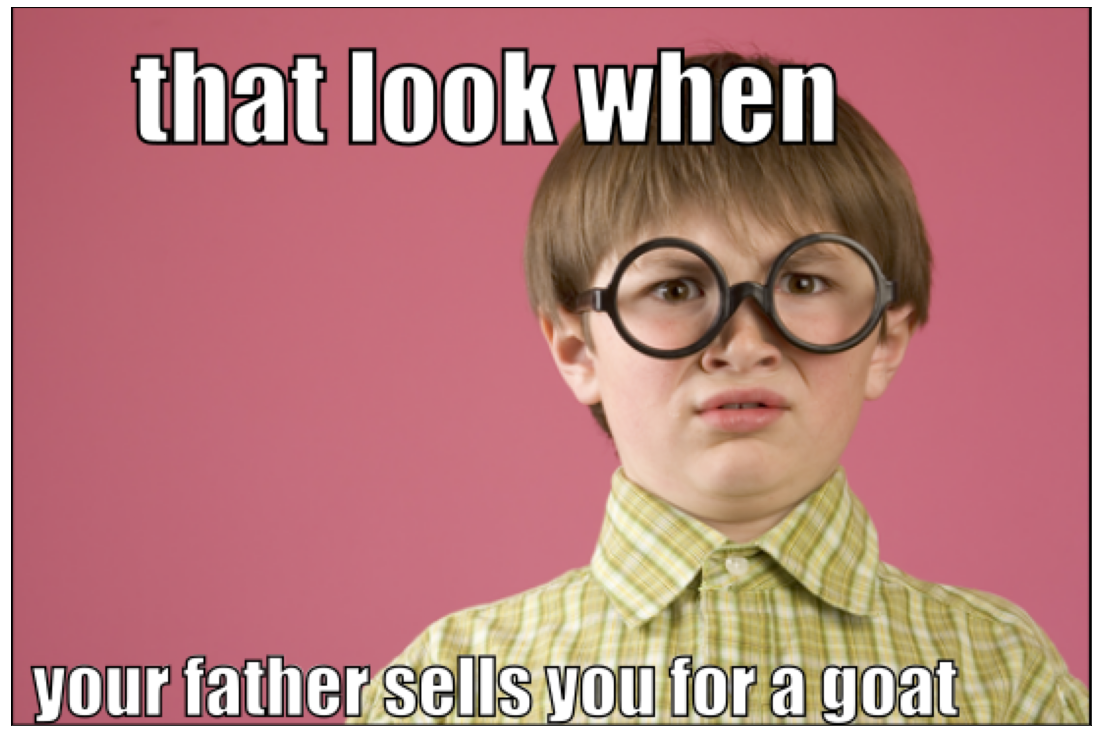

In [89]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/hateful_memes/img")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/hateful_memes/img",imgdir[1]))))

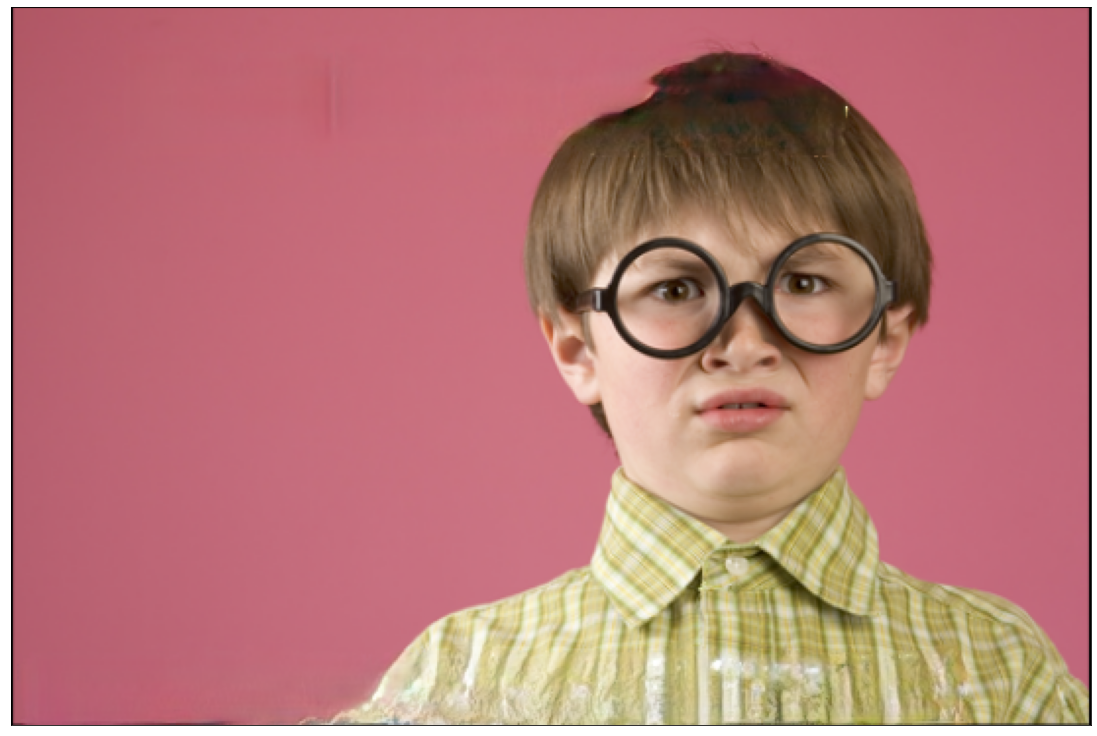

In [90]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/img_clean/")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/img_clean/",imgdir[1]))))